# ML Case Study 8


In [2]:
!pip install nltk

   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.5 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.5 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.5 MB ? eta -:--:--
   ------------- -------------------------- 0.5/1.5 MB 409.0 kB/s eta 0:00:03
   -------------------- ------------------- 0.8/1.5 MB 588.4 kB/s eta 0:00:02
   --------------------------- ------------ 1.0/1.5 MB 689.2 kB/s eta 0:00:01
   --------------------------- ------------ 1.0/1.5 MB 689.2 kB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 785.0 kB/s eta 0:00:00



[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: C:\Users\ASUS\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [4]:
!pip install wordcloud



[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: C:\Users\ASUS\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import nltk
from nltk.corpus import movie_reviews
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from wordcloud import WordCloud

In [6]:
nltk.download('movie_reviews')

reviews = []
for category in movie_reviews.categories():
    for fileid in movie_reviews.fileids(category):
        reviews.append((movie_reviews.raw(fileid), category))

df = pd.DataFrame(reviews, columns=["review", "sentiment"])
df["sentiment"] = df["sentiment"].map({"pos": 1, "neg": 0})

print("Dataset Shape:", df.shape)
df.head()


[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\movie_reviews.zip.


Dataset Shape: (2000, 2)


,review,sentiment
0,"plot : two teen couples go to a church party ,...",0
1,the happy bastard's quick movie review \ndamn ...,0
2,it is movies like these that make a jaded movi...,0
3,""" quest for camelot "" is warner bros . ' firs...",0
4,synopsis : a mentally unstable man undergoing ...,0


## Visualization

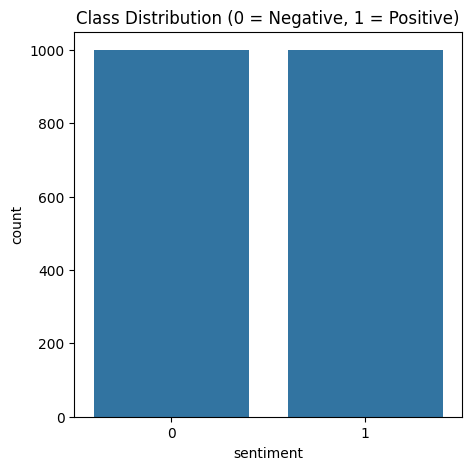

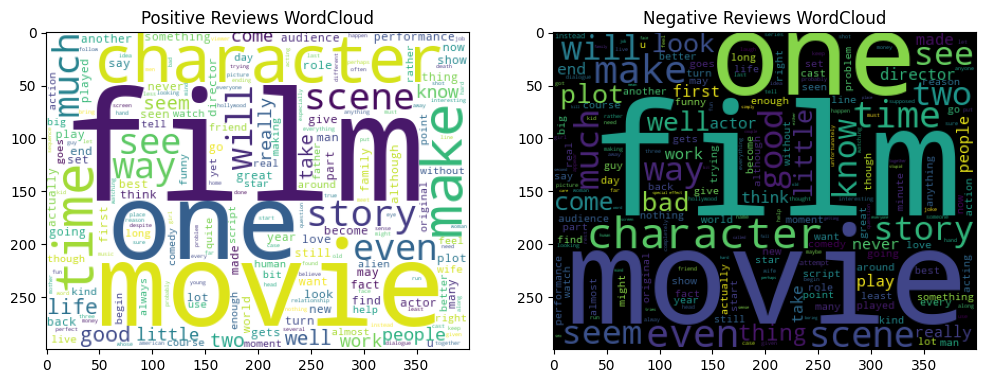

In [7]:
plt.figure(figsize=(5,5))
sns.countplot(x="sentiment", data=df)
plt.title("Class Distribution (0 = Negative, 1 = Positive)")
plt.show()

# Generate WordClouds
positive_text = " ".join(df[df["sentiment"]==1]["review"])
negative_text = " ".join(df[df["sentiment"]==0]["review"])

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(WordCloud(width=400, height=300, background_color="white").generate(positive_text))
plt.title("Positive Reviews WordCloud")

plt.subplot(1,2,2)
plt.imshow(WordCloud(width=400, height=300, background_color="black").generate(negative_text))
plt.title("Negative Reviews WordCloud")
plt.show()

## Train-test split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    df["review"], df["sentiment"], test_size=0.2, random_state=42, stratify=df["sentiment"]
)


## TF-IDF vectorization

In [9]:
vectorizer = TfidfVectorizer(max_features=3000, stop_words="english")
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

print("TF-IDF Shape:", X_train_tfidf.shape)


TF-IDF Shape: (1600, 3000)


## Model Training

In [10]:
model = LogisticRegression(max_iter=500)
model.fit(X_train_tfidf, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,500
,multi_class,'deprecated'


## Model Evaluation


Accuracy: 0.835

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.81      0.83       200
           1       0.82      0.86      0.84       200

    accuracy                           0.83       400
   macro avg       0.84      0.83      0.83       400
weighted avg       0.84      0.83      0.83       400



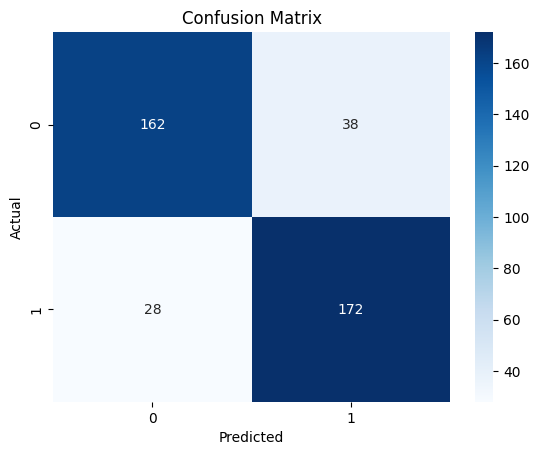

In [11]:
y_pred = model.predict(X_test_tfidf)

print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## Example predictions

In [12]:
examples = [
    "The movie was absolutely fantastic and heartwarming!",
    "I hated every minute of this film, it was terrible."
]

example_vec = vectorizer.transform(examples)
predictions = model.predict(example_vec)

for text, pred in zip(examples, predictions):
    print(f"Review: {text}\nSentiment: {'Positive' if pred==1 else 'Negative'}\n")

Review: The movie was absolutely fantastic and heartwarming!
Sentiment: Positive

Review: I hated every minute of this film, it was terrible.
Sentiment: Negative

